<h1><center> WIMP Direct Detection</center></h1>

In this lab we will be using what we learned in Section 3.1 to calculatethe the expected number of recoil events for a WIMP direct detection experiment and hence generate constraints on the spin independent WIMP-nucleon cross-section $\sigma_{\mathrm{p,SI}}$.

A lot of the equation we use in this lab sheet are explained in more detail in: <a href="https://arxiv.org/abs/1209.3339">Annual Modulation of Dark Matter: A Review</a> by Katherine Freese</li>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=18)

We have seen that the differential rate of collision events per unit of detector mass is given by

\begin{equation}
    \frac{\mathrm{d}R}{\mathrm{d}E_{nr}} = \frac{1}{2m_{N}}\frac{\rho_{\chi}}{m_{\chi}}\left\langle v \frac{\mathrm{d}\sigma}{\mathrm{d}E_{nr}} \right\rangle.
\end{equation}

Assuming that the collisions are elastic, this can be rewritten as

\begin{equation}
    \frac{\mathrm{d}R}{\mathrm{d}E_{nr}} = \frac{1}{2m_{\chi}\mu^2}\sigma(q)\rho_{\chi}\eta\left(v_{min}(E_{nr}, t)\right)
\end{equation}

where $\mu = \frac{m_{\chi}m_{N}}{(m_{\chi} + m_N)}$ is the WIMP-nucleus reduced mass and $\eta\left(v_{min}(E_{nr}, t)\right)$ is the mean inverse speed. The mean inverse speed is given by the inverse velocity integral over the dark
matter distribution $f(v,t)$.

## 1) Calculating the mean-inverse speed pt 1

Fortunately there are a number of analytical solutions for the mean inverse speed which allow us to avoid any nasty integrals. The simplest of which is a Maxwellian distribution with $v_{esc} = \infty$:

\begin{equation}
    \eta(v_{min}, t) = \frac{1}{2v_{obs}}\left[\mathrm{erf}(x+y)-\mathrm{erf}(x-y)\right]
\end{equation}

where $x=v_{min}/v_0$ and $y = v_{obs}/v_0$. Here, $v_{min}$ is the minimum WIMP velocity which can preduce a recoil above the threshold $E_{nr}$, $v_0$ is the average WIMP velocity (given by the speed at which the sun orbits the Galaxy) and $v_{obs}$ is the observed WIMP velocity. 

<h4>Tasks:</h4>
<ul>
    <li>Write a function to calculate $\eta$ and plot a curve of $\eta$ as a function of $v_{min}$</li>      
</ul>

<i><h4>Hints:</h4>
<ul>
    <li>Since we are not considering any annual/daily modulation in the WIMP velocity we can simply set $v_{obs} = v_0$.
</ul></i>

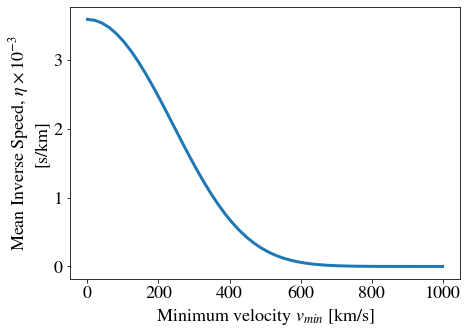

In [2]:
# Average speed of the Suns orbit 
v0 = 235 # km/s
vobs = v0 # km/s

def meanInvSpeed(vobs, vmin, v0):
    '''Returns mean inverse speed in s/km
    
       All inputs in km/s
    '''
    x = vmin/v0
    y = vobs/v0
    return 1/(2*vobs)*(erf(x+y) - erf(x-y))

plt.figure(figsize = (7, 5))
vmin = np.linspace(0, 1000)
plt.plot(vmin, meanInvSpeed(vobs, vmin, v0)*1e3, lw = 3)
plt.ylabel("Mean Inverse Speed, $\eta \\times 10^{-3}$\n[s/km]");
plt.xlabel(r"Minimum velocity $v_{min}}$ [km/s]");
plt.show()

## 2) Cross section

We can write our scattering cross-section as the product of the scattering cross-section in
the zero-momentum-transfer limit $\sigma_0$, and some momentum dependent form-factor $F^2(q)$  to account for the finite size of the nucleus:

\begin{equation}
    \sigma(q) = \sigma_0 F^2(q).
\end{equation}

We can then seperate $\sigma_0$ into it's spin dependent and independent components

\begin{equation}
    \sigma_0 = \sigma_{\mathrm{SI}} + \sigma_{\mathrm{SD}}
\end{equation}

It is then possible to write 

\begin{equation}
    \sigma_{\mathrm{SI}} \approx \frac{\mu^2}{\mu_p^2}A^2\sigma_{\mathrm{p,SI}},
\end{equation}

where $\sigma_{\mathrm{p,SI}}$ is the spin independent WIMP-proton cross-section and $\mu_p$ is the WIMP-proton reduced mass.

For heavy detector nuclei $\mu^2/\mu_p^2 \approx A^2$. Therefore, the spin independent cross section effectively scales as $A^4$. The same is not true for spin dependent interactions. This is one of the reasons why the spin independent term often dominates over the spin dependent term. We will therefore simply assume $\sigma_0=\sigma_{\mathrm{SI}}$.

The spin independent form factor is essentially a Fourier transform of the mass distribution of the nucleus. There are a number of possible form-factors one can use. One of the most commonly used, and the one we will use in this lab, is the <b>Helm form-factor</b>.

<h4>Tasks:</h4>
<ul>
    <li> Look up how the Helm form-factor is defined in: <a href="https://arxiv.org/abs/hep-ph/0608035">Model Independent Form Factors for Spin Independent Neutralino-Nucleon
Scattering from Elastic Electron Scattering Data</a>.</li>      
    <li> Use this to write a function which returns the form factor as a function of the recoil energy. This function should also take $A$ as an input to allow for different detector materials.</li>   
    <li> Plot this form-factor as a function of recoil energy $E_{nr}$ for detector nuclei composed of three different materials used for WIMP detection of your choice.</li>
</ul>

<i> <h4>Hints:</h4>
<ul>
    <li>The equation for the form-factor is given in terms of the momentum transfer $q$. You will therefore first have to determine how this is related to the recoil energy $E_{nr}$.</li>
    <li>Be careful with the units!</li>    
</ul></i>

### Helm form-factor

Helm form-factor is given by

\begin{equation}
    F(q) = 3e^{-q^2s^2/2}\frac{\sin{(qr_n)} - qr_n\cos(qr_n)}{(qr_n)^3}
\end{equation}

where $r_n$ is the effective nuclear radius given by

\begin{equation}
    r_n^2 = c^2 + \frac{7}{3}\pi^2a^2 - 5s^2
\end{equation}

with constants $s = 0.9$ fm, $a = 0.52$ fm and $c \approx 1.23A^{1/3}-0.6$ fm.

The momentum transfer related to the recoil energy via

\begin{equation}
    q = m_Tv_T = \sqrt{2E_{nr}m_T}.
\end{equation}

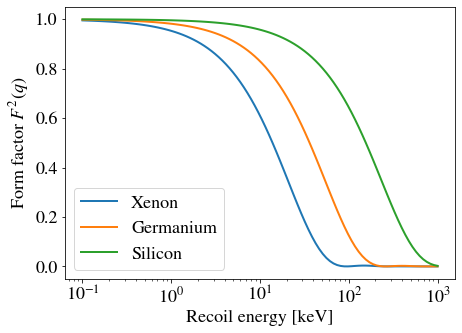

In [3]:
hbar = 6.58e-25 # GeV s
c = 3e8 # m / s
nucleon_mass = 0.938 # GeV

fm2GeV = (1e-15)/(hbar * c)

def HelmFF(TargAtmcMass, E_nr):
    target_mass = TargAtmcMass*nucleon_mass # GeV
    
    # momentum transfer
    q = np.sqrt(2*E_nr*target_mass)
    
    # constants in GeV^{-1}
    s = 0.9*fm2GeV # GeV^{-1}
    a = 0.52*fm2GeV # GeV^{-1}
    c = (1.23*TargAtmcMass**(1/3)-0.60)*fm2GeV # GeV^{-1}
    
    # effective nuclear radius
    r = np.sqrt(c**2 + (7/3)*np.pi**2*a**2 - 5*s**2) # GeV^{-1}
    
    F1 = 3*np.exp(-q**2*s**2/2)
    F2 = (np.sin(q*r)-q*r*np.cos(q*r))/(q*r)**3
    
    return F1*F2

plt.figure(figsize = (7, 5))
E_nr = np.logspace(-7, -3, 100) # GeV
plt.semilogx(E_nr*1e6, HelmFF(131, E_nr)**2,lw=2, label = "Xenon")
plt.semilogx(E_nr*1e6, HelmFF(72, E_nr)**2,lw=2, label = "Germanium")
plt.semilogx(E_nr*1e6, HelmFF(28, E_nr)**2,lw=2, label = "Silicon")
plt.legend()
plt.ylabel("Form factor $F^2(q)$");
plt.xlabel("Recoil energy [keV]");

## 3) Differential Detection Rate

Now that we have $\eta(v_{min})$ and $\sigma(q)$ we can calculate $\frac{\mathrm{d}R}{\mathrm{d}E_{nr}}$.

<h4>Tasks:</h4>
<ul>
    <li>Write a function for $\frac{\mathrm{d}R}{\mathrm{d}E_{nr}}$ which uses your functions for mean inverse speed and form-factor to calculate the differential rate of collision events per unit of detector mass. This function should take the WIMP mass $m_{\chi}$, the target atomic mass $A$, the SI WIMP-proton cross-section $\sigma_{\mathrm{p,SI}}$ and the recoil energy $E_{nr}$ as inputs.</li>      
    <li>Use this to plot $\frac{\mathrm{d}R}{\mathrm{d}E_{nr}}$ as a function of $E_{nr}$ for some detector material of your choice for three different WIMP masses $\sim 100$GeV.</li>
    <li>Plot $\frac{\mathrm{d}R}{\mathrm{d}E_{nr}}$ as a function of $E_{nr}$ for $m_{\chi} = 100$ GeV for three different detector materials.</li>  
</ul>

<i> <h4>Hints:</h4>
<ul>
    <li>Seriously, be careful with the units.</li>
</ul></i>

In [4]:
def reducedMass(M1, M2):
    return M1*M2/(M1+M2)

cm2GeV = 1/(hbar*100*c) # GeV^{-1}/cm

def diffCrossSec(M_wimp, TargAtmcMass, wimp_p_cross_section, E_nr, 
                 v0=235, dm_density=0.4, vobs = None):
    
    # convert wimp-proton cross-section from cm^2 into GeV^{-2}
    wimp_p_cross_section = wimp_p_cross_section*cm2GeV**2 # GeV^{-2}
    
    # convert dm density from GeV cm^{-3} to GeV^4
    dm_density = dm_density/cm2GeV**3 # GeV^4
    
    if vobs == None:
        vobs = v0 # km/s
        
    M_target = TargAtmcMass*nucleon_mass # GeV
    
    # Reduced masses
    mu_t = reducedMass(M_wimp, M_target) # GeV
    mu_p = reducedMass(M_wimp, nucleon_mass) # GeV
    
    # spin independent cross-section
    sig_SI = wimp_p_cross_section*mu_t**2/mu_p**2*TargAtmcMass**2 # GeV^{-2}

    # total interaction cross-section
    sig_0 = sig_SI*HelmFF(TargAtmcMass, E_nr)**2 # GeV^{-2}
    
    vmin = np.sqrt(M_target*E_nr/(2*mu_t**2)) # no units
    
    inv_speed = meanInvSpeed(vobs, vmin*(c*1e-3), v0)*(c*1e-3) # no units
    
    dRdE = 1/(2*M_wimp*mu_t**2)*sig_0*dm_density*inv_speed # GeV^{-1}
    
    return dRdE
    

### dR/dE for different WIMP masses

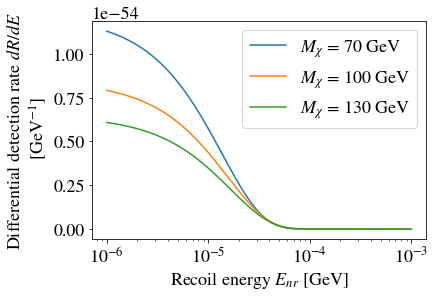

In [5]:
E_nr = np.logspace(-6, -3, 1000) # GeV

wimp_masses = [70, 100, 130]

for wimp_mass in wimp_masses:
    plt.semilogx(E_nr, diffCrossSec(wimp_mass, 131, 1e-45, E_nr), 
                 label = "$M_{\chi}$ = " + str(wimp_mass) + " GeV")
plt.xlabel("Recoil energy $E_{nr}$ [GeV]")
plt.ylabel("Differential detection rate $dR/dE$\n [GeV$^{-1}$]")
plt.legend()
plt.show()

### dR/dE for different detector masses

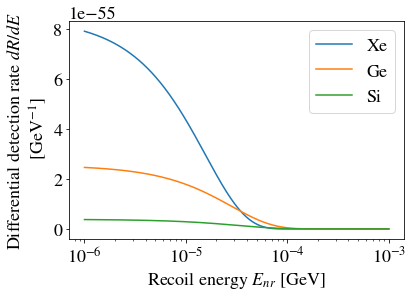

In [6]:
E_nr = np.logspace(-6, -3, 1000) # GeV

TargAtmcMasses = [131, 72, 28]
targetLabels = ["Xe", "Ge", "Si"]

for i, TargAtmcMass in enumerate(TargAtmcMasses):
    plt.semilogx(E_nr, diffCrossSec(100, TargAtmcMass, 1e-45, E_nr), label = targetLabels[i])
    
plt.xlabel("Recoil energy $E_{nr}$ [GeV]")
plt.ylabel("Differential detection rate $dR/dE$\n [GeV$^{-1}$]")
plt.legend()

## 4) Calculating expected number of recoil events

Expected number of events is given by integrating over the detectable range of recoil energies. Assuming perfect experimental efficiency in over this range of energyies, the number of expected recoil events is given by

\begin{equation}
   n(\sigma_{p, SI}) = M_TTR = M_TT\int_{\min{E_{nr}}}^{\max{E_{nr}}}{\frac{dR}{dE_{nr}}(\sigma_{p, SI})dE_{nr}}
\end{equation}

where $M_T$ is the total detector mass and $T$ is the total detection time.



<h4>Tasks:</h4>
<ul>
    <li>Write a function for which calculates the number of recoil events we would expect to see for a detector with atomic mass $A$, total mass $M_T$, total detection time $T$ with some detectable range of recoil energies as a function of $M_{\chi}$ and $\sigma_{\mathrm{p,SI}}$.</li>      
    <li> We saw that the current best contraints of WIMPs from direct detection come from the XENON1T experiment. Look up the relevent values in their results paper: <a href="https://arxiv.org/abs/1805.12562">Dark Matter Search Results from a One Tonne × Year Exposure of XENON1T</a> </li>
    <li> Hence calculate the number of events XENON1T would expect to see as a function of WIMP mass if the WIMP-proton cross section was $10^{-45}$ cm$^2$.
</ul>

<i> <h4>Hints:</h4>
<ul>
    <li>The number of expected events should peak at $\sim 10^2$.</li>
    <li>Something about units.</li>
</ul></i>

### Xenon1T
Xenon1T used a detector with a total mass of $M_T$ = 1 Tonne over $T$ = 278.8 days over a recoil energy range of 4.9 to 40.9 keV.

In [7]:
from scipy.integrate import trapz

kg2GeV = 5.62e26 # GeV/km

def signalCounts(wimp_masses, TargAtmcMass, wimp_p_cross_section, E_nr, detection_time, 
                 detector_mass, v0=235, dm_density=0.4, vobs = None):
    '''Returns expected number of nuclear recoil events for spin-indep wimp-nucleon interation
    
    inputs: - wimp_mass [GeV] (int or float)
            - TargAtmcMass (int or float)
            - wimp_p_cross_section [cm^2] (int or float)
            - detection time [s] (int or float)
            - detector_mass [GeV] (int or float)
    '''
    
    # convert detection time into GeV^(-1)
    detection_time = detection_time/hbar # GeV^{-1}
    
    # convert detector mass into GeV 
    detector_mass = detector_mass*kg2GeV # GeV
    
    #print(detection_time*detector_mass)
    if vobs == None:
        vobs = v0
        
    if type(wimp_masses) == np.float64 or type(wimp_masses) == float:
        wimp_masses = np.array([wimp_masses])
        
    # Calculate dR/dE for each WIMP mass [events GeV^(-1)]
    dRdE = np.asarray([diffCrossSec(M_wimp, TargAtmcMass, wimp_p_cross_section, 
        E_nr, v0 = v0, dm_density=dm_density, vobs = vobs) for M_wimp in wimp_masses]) 
    
    # integrate for R over detectable recoil range [events]
    R = np.array([trapz(dRdE[i,:], E_nr) for i in range(len(wimp_masses))])
    
    # Calculate total number of expected events
    counts = R*detection_time*detector_mass
    
    return counts

Text(0.5, 0, 'WIMP mass $M_{\\chi}$')

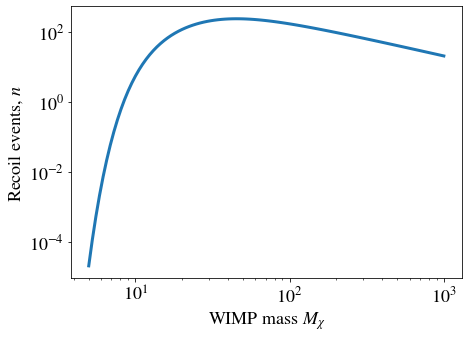

In [8]:
wimp_masses = np.logspace(np.log10(5), 3, 100) # GeV

# recoil detection range
E_nr = np.linspace(4.9e-6, 40.9e-6, int(1e3)) # GeV

total_detector_mass = 1000 # kg
detector_time = 278.8*24*60**2 # seconds

counts = signalCounts(wimp_masses, 131, 1e-45, E_nr, detector_time, total_detector_mass)
plt.figure(figsize = (7,5))
plt.loglog(wimp_masses, counts, lw = 3)
plt.ylabel("Recoil events, $n$")
plt.xlabel("WIMP mass $M_{\chi}$")

## 5) Constraining $\sigma_{\mathrm{p, SI}}$

From Poisson statistics, the probability of k events happening in interval t is given by

\begin{equation}
    P(\text{k events in interval t}) = \frac{(rt)^ke^{-rt}}{k!}
\end{equation}

where $t$ is the interval and $r$ is the rate (such that $rt$ is the expected number of events $n$). Therefore, the probability of seeing zeros events given an expected number $n$ is simply given by

\begin{equation}
    P(k=0|n) = e^{-n}
\end{equation}

We can then make a (somewhat crude) constraint on $\sigma_{\mathrm{p, SI}}$ by setting $P = 0.1$. 

<h4>Tasks:</h4>

<ul>
    <li>Use scipy.optimize.root or similar to find $\sigma_{\mathrm{p, SI}}$ such that $P(k=0|n) = 0.1$ as a function of WIMP mass for the XENON1T case and plot the result</li> 
    <li>(Optional) Repeat this for $k>0$.</li>      
</ul>
</br></br></br>

<i><h4>Hints:</h4>
<ul>
    <li>Take the log of both sides of our equation for $P(k=0|n)$</li> 
    <li><a href="https://en.wikipedia.org/wiki/UNIT">United Nations Intelligence Taskforce</a> (s)</li>
</ul></i>

In [9]:
from scipy.optimize import root
import math

def solve(log_cross_sec, M_wimp, TargAtmcMass, E_nr, detection_time, detector_mass,k=0,
                 v0=235, dm_density=0.4, vobs = None):
    
    n = signalCounts(M_wimp, TargAtmcMass, 10**log_cross_sec, E_nr, detection_time, detector_mass,
                 v0=v0, dm_density=dm_density, vobs = vobs)
    return k*np.log(n) - n - np.log(math.factorial(k))-np.log(0.1)

def constrain(wimp_masses, TargAtmcMass, E_nr, detection_time, detector_mass, k = 0,
                 v0=235, dm_density=0.4, vobs = None):
    
    if type(wimp_masses) == np.float64 or type(wimp_masses) == float:
        wimp_masses = np.array([wimp_masses])
    
    # Find wimp-nucleon cross section such that P(n=0|signal)=0
    sigma = np.asarray([10**root(solve, 1, 
            args = (M_wimp, TargAtmcMass, 
                    E_nr, detection_time, 
                    detector_mass,k, v0, 
                    dm_density, vobs)).x[0] for M_wimp in wimp_masses])
    # This sigma is already in units of cm^2 since singnalCounts() and dRdE() 
    # take sigma as an input in cm^2 and THIS is what we solve for
    
    return sigma



No handles with labels found to put in legend.


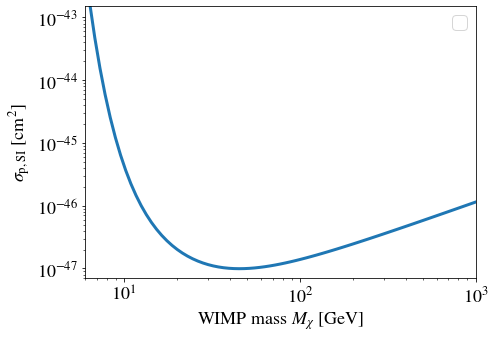

In [19]:
E_nr = np.linspace(4.9e-6, 40.9e-6, int(1e3)) # GeV
wimp_masses = np.logspace(0.6, 3.5, 100)
sigmas_xe = constrain(wimp_masses, 131, E_nr, detector_time, total_detector_mass, k = 0)
#sigmas_xe2 = constrain(wimp_masses, 131, E_nr, detector_time, total_detector_mass, k = 10)

plt.figure(figsize = (7,5))
plt.ylim((7e-48, 1.5e-43))
plt.xlim((6, 1e3))
plt.loglog(wimp_masses, sigmas_xe, lw = 3)#, label = "$k=0$")
#plt.loglog(wimp_masses, sigmas_xe2, lw = 3, label = "$k=10$")
plt.ylabel("$\sigma_{\mathrm{p, SI}}$ [cm$^2$]")
plt.xlabel("WIMP mass $M_{\chi}$ [GeV]")
plt.legend()

np.save("../textbook-figures/data/dd_wimp.npy", [wimp_masses, sigmas_xe])

plt.show()

## 6) Calculating the mean-inverse speed - part 2

The simplified model considered so far neglects the fact that dark matter with a speed above
some escape velocity $v_{esc}$ will leave the galactic system and therefore not be detected. Through the study of the motion of high velocity stars, the escape velocity is found to be about
544 km s$^{-1}$. This can be factored into the model simply by imposing that $\tilde{f}(v>v_{esc}) = 0$. This however, produces a sharp discontinuity in the distribution at the escape velocity which is not characteristic of what we would expect to see. 

This transition in the distribution near the escape velocity can be improved by including an additional exponential term:

\begin{equation}
    f(v) = \left( \frac{1}{\pi v_0^2}  \right)^{3/2}\left[\exp{\left(\frac{-v^2}{v_0^2}\right)} - \exp{\left(\frac{-v^2_{esc}}{v_0^2}\right)}\right].
\end{equation}

Fortunately, the resulting mean inverse speed for this also has an analytical form given by

\begin{equation}
    \eta(v_{min}) = 
    \begin{cases} \frac{1}{v_{obs}}, &\text{for } z < y, x < |y-z| \\
                  \frac{1}{2v_{obs}N_{esc}}\left[\mathrm{erf}(x+y) -
         \mathrm{erf}(x-y) -\frac{4}{\sqrt{\pi}}\left(1 - x^2 - 
         \frac{1}{3}y^2 - z^2 \right)ye^{-z^2} \right] &\text{for } z > y, x < |y-z| \\
                   \frac{1}{2v_{obs}N_{esc}}\left[\mathrm{erf}(z) -
         \mathrm{erf}(x-y) -\frac{2}{\sqrt{\pi}}\left(y + z - x- \frac{1}{3} (y-2z-x)(y+z-x)^2\right)e^{-z^2}  \right] &\text{for } |y-z|<x<y+z \\
         0 &\text{for } y+z<x \\
\end{cases}
\end{equation}

where $x$ and $y$ are defined as before with $z = v_{esc}/v_0$ and where

\begin{equation}
    N_{esc} = \mathrm{erf}(z) - \frac{2}{\sqrt{\pi}}z\left(1 + \frac{2}{3}z^2 \right)e^{-z^2},
\end{equation}

is a normalization factor.

I have double checked that I've written this out correctly but please see Appendix B.1 of <a href="https://arxiv.org/abs/1209.3339">Annual Modulation of Dark Matter: A Review</a> if you think there is a mistake (We use $\beta=1$).

<h4>Tasks:</h4>

<ul>
    <li>Write a new function for the mean inverse speed using the equation above.</li>  
</ul>

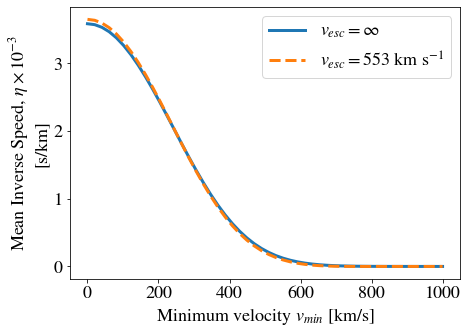

In [11]:
def meanInvSpeed2(vobs, vmins, v0, vesc):
    z = vesc/v0
    Nesc = erf(z) - (2/np.sqrt(np.pi))*z*(1+2*z**2/3)*np.exp(-z**2)
    # Empty array to store inverse mean speed values
    eta = np.zeros(len(vmins))
    for b in range(len(vmins)):
        vmin = vmins[b]
        x = vmin/v0
        y = vobs/v0
        if z < y and x < abs(y-z):
            eta[b] = 1/vobs

        elif z > y and x < abs(y-z):
            func1 = (4/(np.sqrt(np.pi)))*(1-(x**2 + (y**2)/3-z**2))*y*np.exp(-z**2)
            eta[b] = (1/(2*Nesc*vobs))*(erf(x+y) - erf(x-y) - func1)

        elif abs(y-z) < x and x < y + z:
            func2 = (2/(np.sqrt(np.pi)))*(y + z - x - \
            (1/3)*(y - 2*z - x)*(y + z - x)**2)*np.exp(-z**2)
            eta[b] = (1/(2*Nesc*vobs))*(erf(z)-erf(x-y)-func2)

        elif y + z < x:
            eta[b] = 0
            #print('eta = 0')
        else:
            print('Something went wrong')
    return eta
        
vmins = np.linspace(0, 1000)
vesc = 553 # Escape velocity of dark matter km/s
    
plt.figure(figsize = (7, 5))            
plt.plot(vmins, meanInvSpeed(vobs, vmins, v0)*1e3,'-', linewidth = 3, label = "$v_{esc} = \infty$")    
plt.plot(vmins, meanInvSpeed2(vobs, vmins, v0, vesc)*1e3,'--', linewidth = 3, label = "$v_{esc} = 553$ km s$^{-1}$")    
plt.ylabel("Mean Inverse Speed, $\eta \\times 10^{-3}$\n[s/km]");
plt.xlabel(r"Minimum velocity $v_{min}}$ [km/s]");
plt.legend()
plt.show()

## 7) Experimental effciencies

So far we have assumed that the experimental effciency is 1 within some finite range of recoil energies. However, we know this isn't quite true. The true effciency for XENON1T is shown in figure 1 of their  results paper.

If we let $S(E_{nr})$ be the effciency, then we can modify our equation for the expected number of recoil events as follows

\begin{equation}
   n(\sigma_{p, SI}) = M_TTR = M_TT\int_{\min{E_{nr}}}^{\max{E_{nr}}}S(E_{nr}){\frac{dR}{dE_{nr}}(\sigma_{p, SI})dE_{nr}}.
\end{equation}

<h4>Tasks:</h4>

<ul>
    <li>Use a tool such as <a href = "https://apps.automeris.io/wpd/">WebPlotDigitizer</a> to <i>digitise</i> the effciency (solid black line) shown in figure 1 of the XENON1T paper.</li> 
    <li>Using a tool such as <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d">scipy.interpolate.interp1d</a>, create a cubic spline for this data.</li> 
    <li>Modify or write new functions to calculate the expected number of recoil events given this efficiency.</li> 
    <li>Hence, recalculate the constraints on $\sigma_{\mathrm{p, SI}}$ and plot as a function of WIMP mass.</li>
</ul>



In [12]:
from scipy.integrate import trapz

kg2GeV = 5.62e26 # GeV/km

def diffCrossSec2(M_wimp, TargAtmcMass, wimp_p_cross_section, E_nr, v_esc,
                 v0=235, dm_density=0.4, vobs = None):
    
    # convert wimp-proton cross-section from cm^2 into GeV^{-2}
    wimp_p_cross_section = wimp_p_cross_section*cm2GeV**2 # GeV^{-2}
    
    # convert dm density from GeV cm^{-3} to GeV^4
    dm_density = dm_density/cm2GeV**3 # GeV^4
    
    if vobs == None:
        vobs = v0 # km/s
        
    M_target = TargAtmcMass*nucleon_mass # GeV
    
    # Reduced masses
    mu_t = reducedMass(M_wimp, M_target) # GeV
    mu_p = reducedMass(M_wimp, nucleon_mass) # GeV
    
    # spin independent cross-section
    sig_SI = wimp_p_cross_section*mu_t**2/mu_p**2*TargAtmcMass**2 # GeV^{-2}

    # total interaction cross-section
    sig_0 = sig_SI*HelmFF(TargAtmcMass, E_nr)**2 # GeV^{-2}
    
    vmin = np.sqrt(M_target*E_nr/(2*mu_t**2)) # no units
    
    inv_speed = meanInvSpeed2(vobs, vmin*(c*1e-3), v0, v_esc)*(c*1e-3) # no units
    
    dRdE = 1/(2*M_wimp*mu_t**2)*sig_0*dm_density*inv_speed # GeV^{-1}
    
    return dRdE

def signalCounts2(wimp_masses, TargAtmcMass, wimp_p_cross_section, E_nr, detection_time, 
                  detector_mass,v_esc,sensitivity,  v0=235, dm_density=0.4, vobs = None):
    '''Returns expected number of nuclear recoil events for spin-indep wimp-nucleon interation
    
    inputs: - wimp_mass [GeV] (int or float)
            - TargAtmcMass (int or float)
            - wimp_p_cross_section [cm^2] (int or float)
            - detection time [s] (int or float)
            - detector_mass [GeV] (int or float)
    '''
    
    # convert detection time into GeV^(-1)
    detection_time = detection_time/hbar # GeV^{-1}
    
    # convert detector mass into GeV 
    detector_mass = detector_mass*kg2GeV # GeV
    
    #print(detection_time*detector_mass)
    if vobs == None:
        vobs = v0
        
    if type(wimp_masses) == np.float64 or type(wimp_masses) == float:
        wimp_masses = np.array([wimp_masses])
        
    # Calculate dR/dE for each WIMP mass [events GeV^(-1)]
    dRdE = np.asarray([diffCrossSec2(M_wimp, TargAtmcMass, wimp_p_cross_section, 
        E_nr, v_esc, v0 = v0, dm_density=dm_density, vobs = vobs) for M_wimp in wimp_masses]) 
    
    # integrate for R over detectable recoil range [events]
    R = np.array([trapz(dRdE[i,:]*sensitivity(E_nr), E_nr) for i in range(len(wimp_masses))])
    
    # Calculate total number of expected events
    counts = R*detection_time*detector_mass
    
    return counts

def solve2(log_cross_sec, M_wimp, TargAtmcMass, E_nr, detection_time, detector_mass, v_esc, sensitivity,
           k=0, v0=235, dm_density=0.4, vobs = None):
    
    
    n = signalCounts2(M_wimp, TargAtmcMass, 10**log_cross_sec, E_nr, detection_time, detector_mass, 
                      v_esc,sensitivity, v0=v0, dm_density=dm_density, vobs = vobs)
    
    return k*np.log(n) - n - np.log(math.factorial(k))-np.log(0.1)

def constrain2(wimp_masses, TargAtmcMass, E_nr, detection_time, detector_mass,v_esc, sensitivity,
               k = 0, v0=235, dm_density=0.4, vobs = None):
    
    if type(wimp_masses) == np.float64 or type(wimp_masses) == float:
        wimp_masses = np.array([wimp_masses])
    
    # Find wimp-nucleon cross section such that P(n=0|signal)=0
    sigma = np.asarray([10**root(solve2, -43.0, 
            args = (M_wimp, TargAtmcMass, 
                    E_nr, detection_time, 
                    detector_mass, v_esc, sensitivity, k, v0, 
                    dm_density, vobs)).x[0] for M_wimp in wimp_masses])
    # This sigma is already in units of cm^2 since singnalCounts() and dRdE() 
    # take sigma as an input in cm^2 and THIS is what we solve for
    
    return sigma


### Digitized Data 

Text(0.5, 0, 'Nuclear recoil energy [keV]')

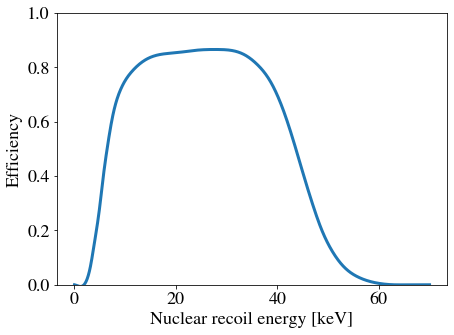

In [13]:
from scipy.interpolate import interp1d

sensitivity_Enr = np.array([0, 1.88385, 3.16597, 3.85252, 4.44059, 5.02753, 5.61311, 6.49363, 7.47444, 9.14953, 11.32446, 14.2944, 20.04282, 24.2062, 28.27112, 33.62725, 36.01026, 38.59429, 41.28248, 43.17702, 45.47179, 46.96791, 48.56272, 50.75243, 53.23731, 55.81862, 58.99346, 62.96036, 66.03401, 68.4136, 70])
sensitivity = np.array([0, 6e-05, 0.06891, 0.14462, 0.21345, 0.29374, 0.3878, 0.50709, 0.61492, 0.72048, 0.78477, 0.83074, 0.85387, 0.86318, 0.86561, 0.84514, 0.81081, 0.74897, 0.63667, 0.52894, 0.38452, 0.29512, 0.21031, 0.12552, 0.06367, 0.02935, 0.00881, 0, 0, 0, 0])

sensitivity_int = interp1d(sensitivity_Enr*1e-6, sensitivity, kind = "cubic")

Enr_test = np.linspace(0, 70e-6, 1000)

plt.figure(figsize = (7,5))
plt.plot(Enr_test*1e6, sensitivity_int(Enr_test), lw = 3)
plt.ylim(0, 1)
plt.ylabel("Efficiency")
plt.xlabel("Nuclear recoil energy [keV]")

In [14]:
E_nr = np.linspace(1e-6, 70e-6, int(1e3)) # GeV
wimp_masses2 = np.logspace(np.log10(8), 3, 20)

sigmas2_xe = constrain2(wimp_masses2, 131, E_nr, detector_time, total_detector_mass,vesc, sensitivity_int, k = 0)
sigmas2_xe2 = constrain2(wimp_masses2, 131, E_nr, detector_time, total_detector_mass,vesc, sensitivity_int, k = 10)

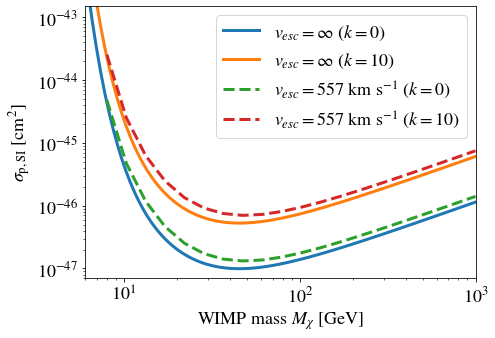

In [15]:
plt.figure(figsize = (7,5))
plt.ylim((7e-48, 1.5e-43))
plt.xlim((6, 1e3))
plt.loglog(wimp_masses, sigmas_xe,lw = 3, label = "$v_{esc} = \infty$ ($k=0$)")
plt.loglog(wimp_masses, sigmas_xe2,lw = 3, label = "$v_{esc} = \infty$ ($k=10$)")

plt.loglog(wimp_masses2, sigmas2_xe,"--", lw = 3, label = "$v_{esc} = 557$ km s$^{-1}$ ($k=0$)")
plt.loglog(wimp_masses2, sigmas2_xe2,"--", lw = 3, label = "$v_{esc} = 557$ km s$^{-1}$ ($k=10$)")

plt.ylabel("$\sigma_{\mathrm{p, SI}}$ [cm$^2$]")
plt.xlabel("WIMP mass $M_{\chi}$ [GeV]")
plt.legend()
plt.show()

## (Optional) Adding more constraint curves

<h4>Tasks:</h4>

<ul>
    <li>Look up some more of the landmark results in WIMP direct detection.</li>
    <li>Find the relevent values to calculate your own $\sigma_{\mathrm{p, SI}}$ constraint curve for each.</li>
    <li>Plot all of these curves together to get something which starts to look like <a href="https://3c1703fe8d.site.internapcdn.net/newman/gfx/news/hires/2016/4-3knownsand3u.jpg"> this</a>.
</ul>

## (Optional) Considering annual modulation

<h4>Tasks:</h4>

<ul>
    <li>Read <a href="https://arxiv.org/abs/1209.3339">Annual Modulation of Dark Matter: A Review</a> to see how $v_{obs}$ varies throughout the year.</li>
    <li>Hence calculate how $\frac{\mathrm{d}R}{\mathrm{d}E_{nr}}$ varies throughout the year.</li>
</ul>

## (Optional) Considering more interesting Velocity Distributions

<h4>Tasks:</h4>

<ul>
    <li>Read appendix B.1 of <a href="https://arxiv.org/abs/1209.3339">Annual Modulation of Dark Matter: A Review</a> find the mean-inverse speeds for cold flows or debris flow.</li>
    <li> Calculate the total differential detection rate given that the total from standard halo model (SHM) and some flow is simply the sum:</li>
</ul>
\begin{equation}
    \left(\frac{\mathrm{d}R}{\mathrm{d}E_{nr}}\right)_{total} = \left(\frac{\mathrm{d}R}{\mathrm{d}E_{nr}}\right)_{SHM} + \left(\frac{\mathrm{d}R}{\mathrm{d}E_{nr}}\right)_{flow}
\end{equation}

<ul>
    <li>Determine how the presence of such local DM structure would influence the expected number of recoil events.</li>
</ul>